<a href="https://colab.research.google.com/github/budialis/Data-Mining/blob/main/test_PCA01_svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Get the IRIS dataset
url = "/content/drive/MyDrive/Data Mining/Iris.txt"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
data

,sepal length,sepal width,petal length,petal width,target
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#prepare the data
x = data.iloc[1:,0:4]
x

,sepal length,sepal width,petal length,petal width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [5]:
#prepare the target
target = data.iloc[1:,4]
target

1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: target, Length: 150, dtype: object

In [6]:
# Singular-value decomposition

from numpy import array
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(x)
result = svd.transform(x)
result


array([[ 5.91220352e+00,  2.30344211e+00],
       [ 5.57207573e+00,  1.97383104e+00],
       [ 5.44648470e+00,  2.09653267e+00],
       [ 5.43601924e+00,  1.87168085e+00],
       [ 5.87506555e+00,  2.32934799e+00],
       [ 6.47699043e+00,  2.32552598e+00],
       [ 5.51542859e+00,  2.07156181e+00],
       [ 5.85042297e+00,  2.14948016e+00],
       [ 5.15851287e+00,  1.77642658e+00],
       [ 5.64458172e+00,  1.99190598e+00],
       [ 6.26482670e+00,  2.42727947e+00],
       [ 5.75150446e+00,  2.02142409e+00],
       [ 5.48017099e+00,  1.97972378e+00],
       [ 4.95064168e+00,  2.04947793e+00],
       [ 6.52528515e+00,  2.91774840e+00],
       [ 6.78960484e+00,  2.82549990e+00],
       [ 6.27173006e+00,  2.60908548e+00],
       [ 5.92899145e+00,  2.26896626e+00],
       [ 6.64757408e+00,  2.39126214e+00],
       [ 6.09424306e+00,  2.36154331e+00],
       [ 6.25352038e+00,  2.12203279e+00],
       [ 6.07305216e+00,  2.27257849e+00],
       [ 5.36933796e+00,  2.49857510e+00],
       [ 6.

In [7]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(result , columns = ['PC1','PC2'])
principal_df 
target.reset_index(drop=True, inplace=True)
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
principal_df

,PC1,PC2,target
0,5.912204,2.303442,Iris-setosa
1,5.572076,1.973831,Iris-setosa
2,5.446485,2.096533,Iris-setosa
3,5.436019,1.871681,Iris-setosa
4,5.875066,2.329348,Iris-setosa
...,...,...,...
145,9.226698,-0.929481,Iris-virginica
146,8.566555,-1.036575,Iris-virginica
147,9.026101,-0.883220,Iris-virginica
148,9.105660,-0.996221,Iris-virginica


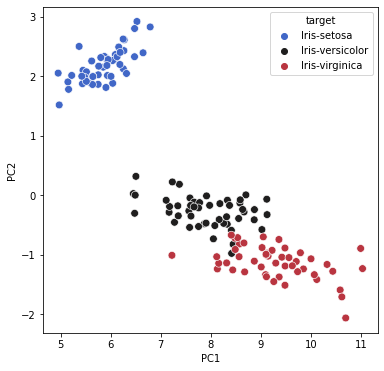

In [8]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(result)
y_kmeans = kmeans.predict(result)

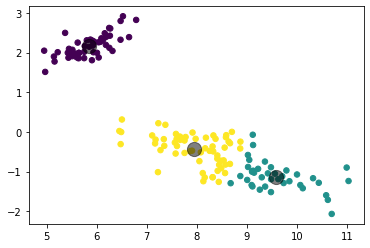

In [10]:
plt.scatter(result[:, 0], result[:, 1], c=y_kmeans, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


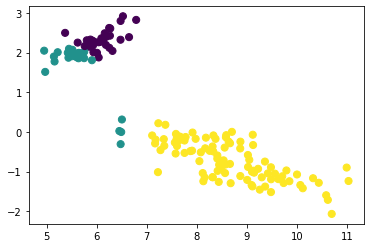

In [11]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(result, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(result.shape[0])[:n_clusters]
    centers = result[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(result, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([result[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(result, 3)
plt.scatter(result[:, 0], result[:, 1], c=labels,
            s=50, cmap='viridis');